In [48]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D,GlobalAveragePooling2D, MaxPool2D
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [34]:
(X_train, y_train), (X_test, y_test)= keras.datasets.cifar10.load_data()

# Now let us build a convolutional neural network(CNN)to train our images


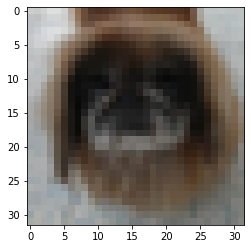

In [35]:
plt.imshow(X_train[999])
plt.show()

In [36]:
X_train.shape

(50000, 32, 32, 3)

In [37]:
cnn=Sequential()
cnn.add(Conv2D(input_shape=(32,32,3), filters=4, kernel_size=(3,3), activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(MaxPool2D())

cnn.add(Conv2D(input_shape=(32,32,3), filters=8, kernel_size=(3,3), activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(input_shape=(32,32,3), filters=16, kernel_size=(3,3), activation='relu'))
cnn.add(Dropout(0.2))


cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')
cnn.summary()







Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 4)         112       
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 4)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 4)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 8)         296       
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        1168      
                                                      

In [38]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 4)         112       
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 4)         0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 4)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 8)         296       
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 16)        1168      
                                                      

In [39]:
X_train=X_train/255
X_test=X_test/255

In [40]:
y_train=to_categorical(y_train)

In [41]:
cnn.fit(X_train, y_train, epochs=5, validation_split=0.15)

Epoch 1/5
1329/1329 [==============================] - 24s 17ms/step - loss: 1.6608 - acc: 0.3965 - val_loss: 1.4549 - val_acc: 0.4768
Epoch 2/5
1329/1329 [==============================] - 30s 22ms/step - loss: 1.3992 - acc: 0.4952 - val_loss: 1.3380 - val_acc: 0.5220
Epoch 3/5
1329/1329 [==============================] - 26s 20ms/step - loss: 1.2970 - acc: 0.5373 - val_loss: 1.2618 - val_acc: 0.5577
Epoch 4/5
1329/1329 [==============================] - 29s 22ms/step - loss: 1.2214 - acc: 0.5644 - val_loss: 1.2870 - val_acc: 0.5473
Epoch 5/5
1329/1329 [==============================] - 30s 22ms/step - loss: 1.1627 - acc: 0.5876 - val_loss: 1.2213 - val_acc: 0.5701


In [42]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [43]:
y_pred_class= y_pred.argmax(axis=1)

In [44]:
y_pred_class

array([3, 1, 0, ..., 3, 4, 7])

In [49]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      1000
           1       0.75      0.66      0.71      1000
           2       0.53      0.37      0.43      1000
           3       0.36      0.42      0.39      1000
           4       0.49      0.46      0.48      1000
           5       0.50      0.40      0.44      1000
           6       0.46      0.89      0.60      1000
           7       0.64      0.62      0.63      1000
           8       0.70      0.66      0.68      1000
           9       0.77      0.55      0.64      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.56     10000
weighted avg       0.58      0.56      0.56     10000



In [50]:
class_name=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

TypeError: 'int' object is not subscriptable

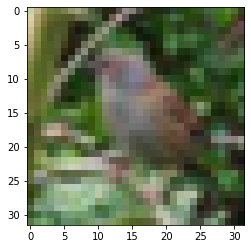

In [53]:
random_index=65
plt.imshow(X_test[random_index])
pred_obj=y_pred_class[random_index]
actual_obj=y_test[random_index[0]]
plt.xlabel(f'Predicted:{class_name[pred_obj]}, Actual:{class_name[actual_obj]}')
plt.show()